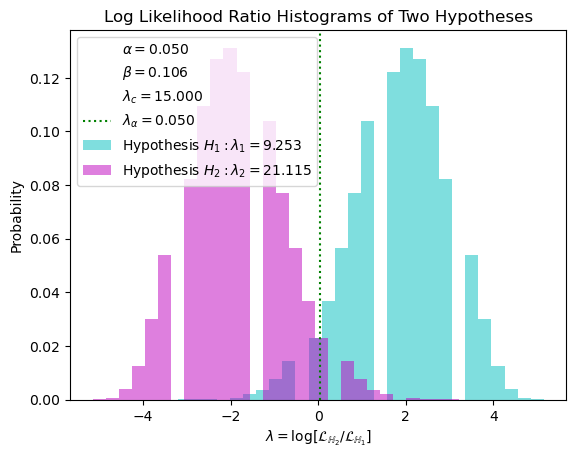

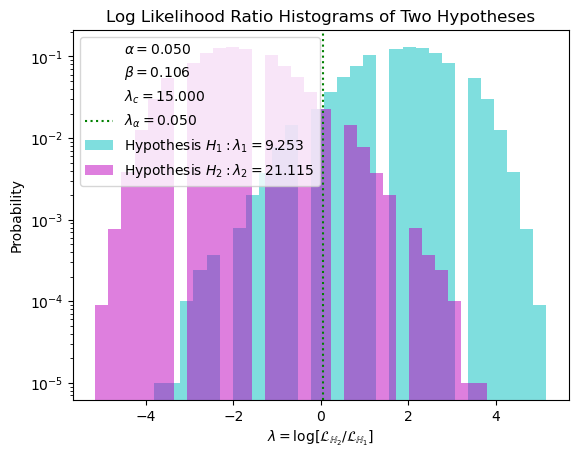

In [11]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math



decay_number = 100000

decay_constant1 = np.random.normal(10.0, 3.0, 10000)
rate1 = np.random.choice(decay_constant1)
distribution1 = random.poisson(rate1, decay_number)
np.savetxt("distribution1.txt", distribution1, fmt='%u')


decay_constant2 = np.random.normal(20.0, 6.0, 10000)
rate2 = np.random.choice(decay_constant2)
distribution2 = random.poisson(rate2, decay_number)
np.savetxt("distribution2.txt", distribution2, fmt='%u')


file1 = open("distribution1.txt", "r")
hypothesis1 = []
for i in file1:
    hypothesis1.append(int(i))
hypothesis1.sort()
hypothesis1 = np.array(hypothesis1)


file2 = open("distribution2.txt", "r")
hypothesis2 = []
for j in file2:
    hypothesis2.append(int(j))  
hypothesis2.sort()      
hypothesis2 = np.array(hypothesis2)


alpha = 0.05
critical_value = hypothesis1[min(int((1 - alpha)*len(hypothesis1)), len(hypothesis1)-1)]
remaining = np.where( hypothesis2 > critical_value)[0][0]
beta = remaining/len(hypothesis2)




k = 0
Liklihood1, Liklihood2 = 0, 0
H1_LLR = []
H2_LLR = []

probability1 = []
probability2 = []

for k in range(0, len(hypothesis1)):

    Liklihood1 = (np.exp( - rate1))*(rate1**hypothesis1[k])/np.math.factorial(hypothesis1[k])
    probability1.append(Liklihood1)
    Liklihood2 = (np.exp( - rate2))*(rate2**hypothesis1[k])/np.math.factorial(hypothesis1[k])
    probability2.append(Liklihood1)
    
    H1_LLR.append(np.log10(Liklihood1/Liklihood2))
    H2_LLR.append(np.log10(Liklihood2/Liklihood1))



w1 = np.ones_like(H1_LLR) / len(H1_LLR)
w2 = np.ones_like(H2_LLR) / len(H2_LLR)


fig, ax = plt.subplots()

plt.plot([], [], ' ', label = r'$\alpha = {:.3f}$'.format(alpha))
plt.plot([], [], ' ', label = r'$\beta = {:.3f}$'.format(beta))
plt.plot([], [], ' ', label = r'$\lambda_c = {:.3f}$'.format(critical_value))
plt.axvline(alpha, linestyle = 'dotted', color = 'green', label = r'$\lambda_\alpha = {:.3f}$'.format(alpha))
plt.hist(H1_LLR, bins = 30, weights = w1, color = 'c', alpha=0.5, label = r"Hypothesis $H_1 : \lambda_1 = {:.3f}$".format(rate1))
plt.hist(H2_LLR, bins = 30, weights = w2, color = 'm', alpha=0.5, label = r'Hypothesis $H_2 : \lambda_2 = {:.3f}$'.format(rate2))
plt.legend(loc = 0)

plt.title('Log Likelihood Ratio Histograms of Two Hypotheses')
plt.xlabel(r'$\lambda = \log [{{\cal L}_{\mathbb{H}_{2}}}/{{\cal L}_{\mathbb{H}_{1}}} ] $')
plt.ylabel('Probability')
#ax.set_yscale('log')
plt.grid(False)
plt.savefig('LLR6.pdf')
plt.show()



fig_log, ax_log = plt.subplots()

plt.plot([], [], ' ', label = r'$\alpha = {:.3f}$'.format(alpha))
plt.plot([], [], ' ', label = r'$\beta = {:.3f}$'.format(beta))
plt.plot([], [], ' ', label = r'$\lambda_c = {:.3f}$'.format(critical_value))
plt.axvline(alpha, linestyle = 'dotted', color = 'green', label = r'$\lambda_\alpha = {:.3f}$'.format(alpha))
plt.hist(H1_LLR, bins = 30, weights = w1, color = 'c', alpha=0.5, label = r"Hypothesis $H_1 : \lambda_1 = {:.3f}$".format(rate1))
plt.hist(H2_LLR, bins = 30, weights = w2, color = 'm', alpha=0.5, label = r'Hypothesis $H_2 : \lambda_2 = {:.3f}$'.format(rate2))
plt.legend(loc = 0)

plt.title('Log Likelihood Ratio Histograms of Two Hypotheses')
plt.xlabel(r'$\lambda = \log [{{\cal L}_{\mathbb{H}_{2}}}/{{\cal L}_{\mathbb{H}_{1}}} ] $')
plt.ylabel('Probability')
ax_log.set_yscale('log')
plt.grid(False)
plt.savefig('LLR_Log6.pdf')
plt.show()